### Lab 5: Analyze Higgs Data:
- Haikun Xue

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

from astropy.table import Table
import pickle

plt.style.use('ggplot')
plt.tight_layout();

<Figure size 640x480 with 0 Axes>

#### Basic of Large Hadron Collider:  
The large Hadron Collider is designed to create and observe particles collisions   
to better understand the particles in the Standard model at the parton level.  
Inside the collider, there are two circular track guided by superconducting magnets.  
Bunches of particles, each with $10^{11}$ protons, are accelerated to near  
speed of light, then squeezed through a spot size of 10 microns, and collide with  
another bunch moving in the opposite direction.  
At the same time, 2800 bunches, spaced 25 ns apart, are also accelerating and colliding.  
This results in a total of 4 GHz collision rate,  
theoretically enough to see ~ 100 Higgs particles a year.

#### Basic of jet structure:  
as we can't "see" the particles and their accelerations,  
the only way we can track them is through the trace they left behind while  
moving and after they collide with each other.  
A jet, in this case, is a collection of particles that travels in the  
same direction, presumably, from bremsstrahlung (showering) and fragmentation of gluons or quarks.   
The most common way to define a jet is visualizing a cone with size:  
$$
R = \sqrt {(\Delta \eta )^2 + (\Delta \phi) ^2)}
$$
and jets are helpful in linking calculations at parton level (quarks and gluons) to measurements at the particles level (pions and protons)

In [2]:
infile = open ("dati/higgs.pkl",'rb')
higgs_dic = pickle.load(infile)
infile.close()
# list all keys of the files
keys = higgs_dic.keys()
keys

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

#### Understanding properties:  
- pt: $ p_t$ Transverse Momentum. $ p_t$ is defined as $ p_t \equiv (p_x, p_y) $ where  
$p_x, p_y$ are invariance when we try to convert frame of view from observation devices  
to partonic center of mass frame.   
- eta: $\eta$, pseudorapidity, is a commonly used spatial coordinate describing the angle   
of a particle relative to the beam axis. $\eta \equiv -\ln \left[\tan \left({\frac  {\theta }{2}}\right)\right]$,  
which means it varies from $+\infty$ to $-\infty$ as $\theta$ varies from 0 to $\pi$, but  
ATLAS and CMS detectors only measure particles up to pseudorapidities
of around ±5.
- phi: $\phi$, measurement of the azimuthal angle (or angle from the x-axis)
- mass: M, The jet mass is calculated from the energies and momenta of its constituents (particles or clusters): 
$$
M \equiv \sqrt {(\sum_{i}^{} E_i )^2 - (\sum_{i}^{} \vec p_i )^2}
$$
- ee2 & ee3: might be related to eccentricity.
- angularity: $\tau$ is a measurement the degree of symmetry of energy flow in a jet.  
Angularity is largely uncorrelated with all of the other observables.
- t1, t2, t3, t21, t32: might be related to time dependency.
- ktDeltaR: $k_t \Delta R$, might be related to anti-kt algorithm and the radius parameter of the jet.  


In [3]:
infile = open ("dati/qcd.pkl",'rb')
qcd_dic = pickle.load(infile)
infile.close()

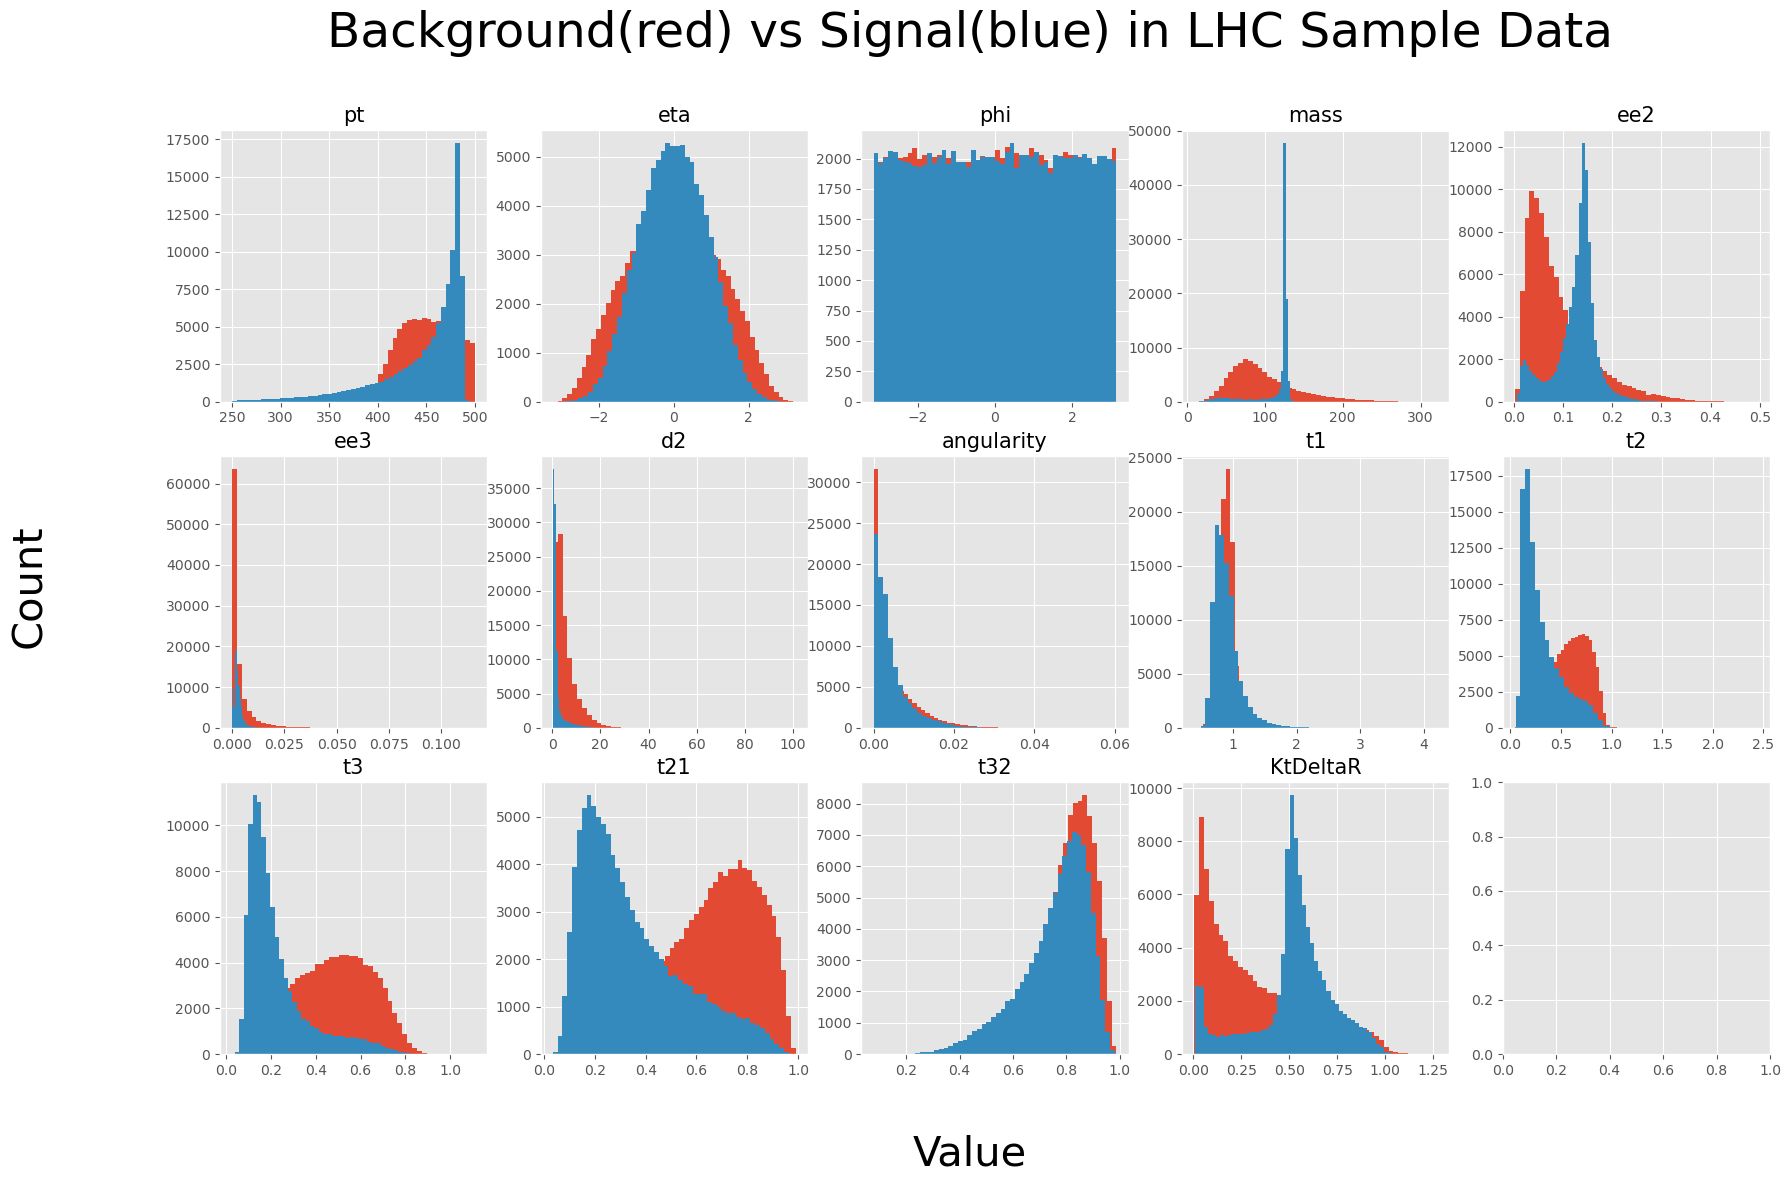

In [4]:
plt.rcParams["figure.figsize"] = (20,12)

fig, ax = plt.subplots(3,5)
bin_Size = 50
fig.suptitle('Background(red) vs Signal(blue) in LHC Sample Data', fontsize = 35)
fig.supxlabel('Value',fontsize = 30)
fig.supylabel('Count',fontsize = 30)

for i, val in enumerate (keys):
    ax_x = int(i/5)
    ax_y = i%5
    ax[ax_x,ax_y].hist(qcd_dic[val], bins = bin_Size)
    ax[ax_x,ax_y].hist(higgs_dic[val], bins = bin_Size)
    ax[ax_x,ax_y].set_title('{}'.format(val), fontsize = 15);

As shown in the graph, there is a clear distinction of background and signal in the  
measurement of Transverse Momentum, mass, ee2, t2, t3, t21, and $k_t \Delta R$

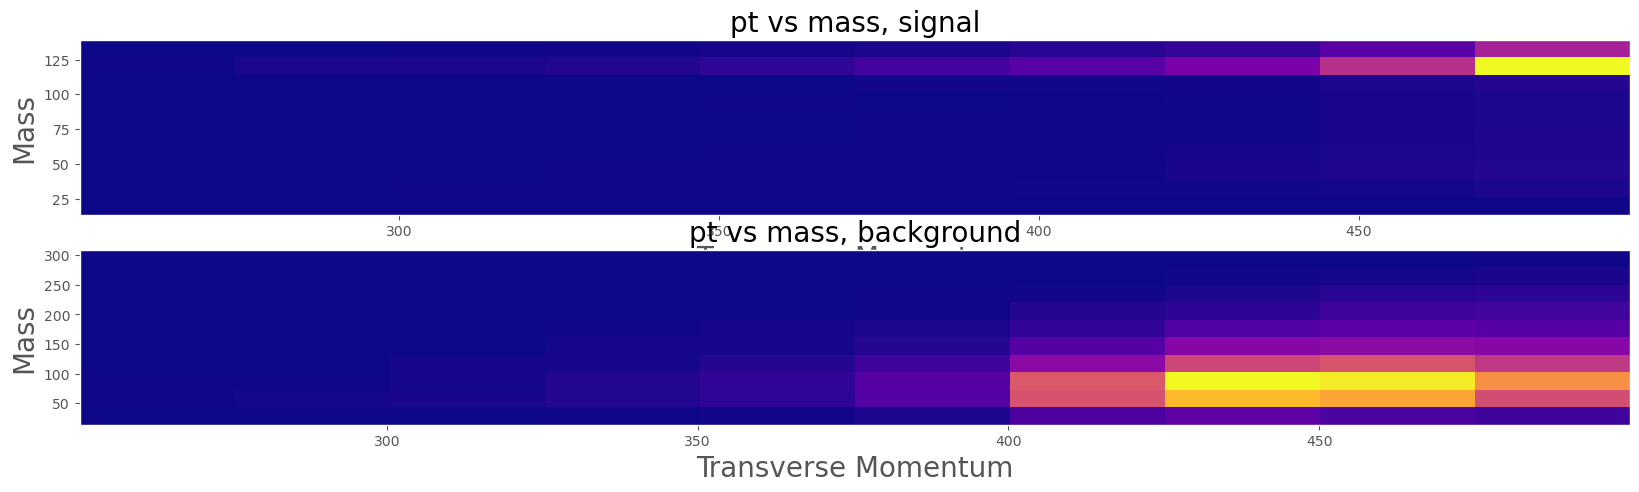

In [5]:
plt.rcParams["figure.figsize"] = (20,5)

fig, ax = plt.subplots(2)
bin_Size = 10
ax[0].hist2d(higgs_dic['pt'][:10000],higgs_dic['mass'][:10000],bins = bin_Size, cmap = 'plasma')
ax[0].set_title('pt vs mass, signal', fontsize = 20)
ax[0].set_xlabel("Transverse Momentum", fontsize = 20)
ax[0].set_ylabel("Mass", fontsize = 20);

ax[1].hist2d(qcd_dic['pt'][:10000],qcd_dic['mass'][:10000],bins = bin_Size, cmap = 'plasma')
ax[1].set_title('pt vs mass, background', fontsize = 20)
ax[1].set_xlabel("Transverse Momentum", fontsize = 20)
ax[1].set_ylabel("Mass", fontsize = 20);

Some further exploration of the dataset, epecially 1 to 1 correlation of the properties.  
according to G. Aad in ATLAS measurements of the properties of jets for boosted particle searches, 

"The strongest correlations observed are those between
jet mass and width (85%) and between planar flow and
eccentricity (80%). The correlation between mass and
width reduces considerably when jets are required to be in
the kinematic region M > 100 GeV. This trend is followed
by almost all observables. The planar flow and eccentricity,
however, are even more strongly anticorrelated in
high-mass jets (90%). The correlation between mass
and pT is weak (12%–16%). Angularity is largely uncorrelated with all of the other observables."
